## Distribution visualization in other settings

여러 다른 Figure-level plotting functions는 'histplot()'과 'kdeplot()'을 활용한다. 

### Plotting joint and marginal distributions

먼저 jointplot()은 이변량 관계형 또는 분포형 플롯에 두 변수의 한계 분포를 보완한다. 기본적으로 jointplot()은 이변량 분포는 scatterplot()을 통해 나타내고, 한계 분포는 histplot()을 사용하여 나타낸다. 

In [2]:
import seaborn as sns

In [3]:
penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
diamonds = sns.load_dataset("diamonds")

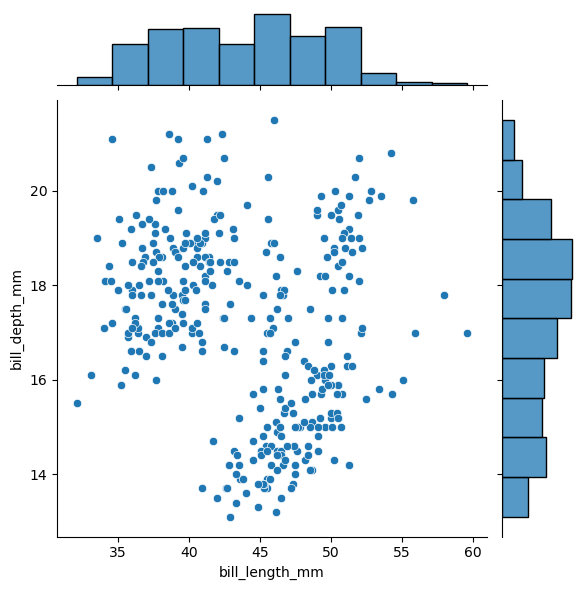

In [4]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

displot()과 유사하게 jointplot()에서 다른 kind='kde'를 설정하면 kdeplot()을 사용하는 조인트와 한계 플롯이 모두 변경된다. 

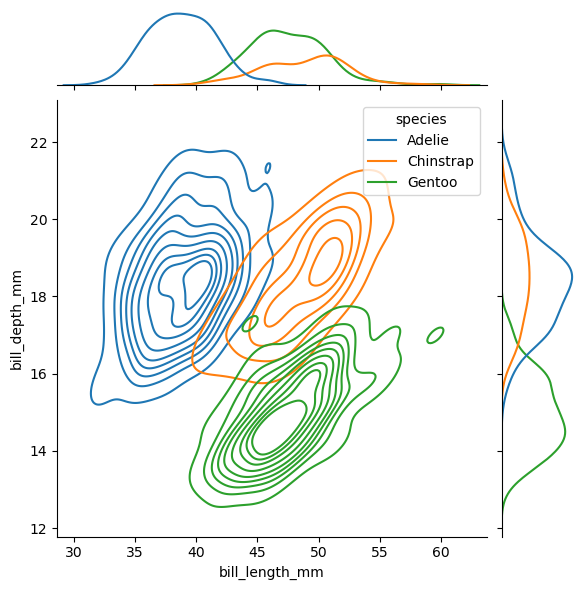

In [5]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

jointplot()은 JointGrid 클래스에 편리한 인터페이스로, 직접 사용될때 더 많은 유연성을 제공한다.

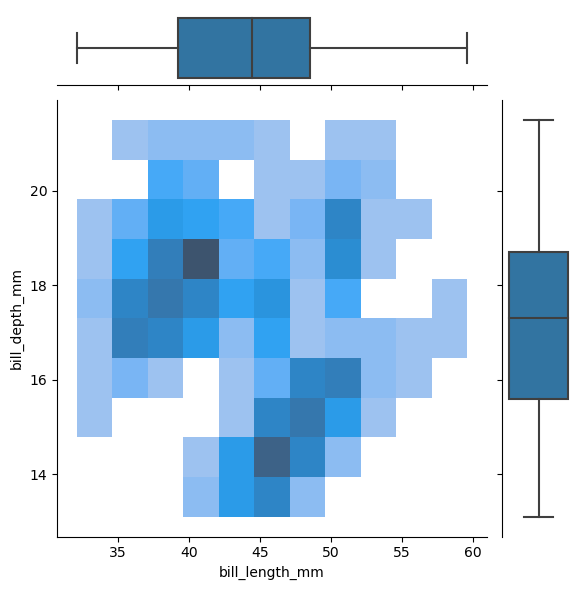

In [6]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

marginal distribution을 사용할 때 좀 더 효과적인 방법은 'rug' 플롯을 활용하는 것이다. 이것은 그래프의 구석에 작은 눈금을 추가하여 각각의 관측값을 표현한다. 이는 distplot()에 내장되어 있다. 

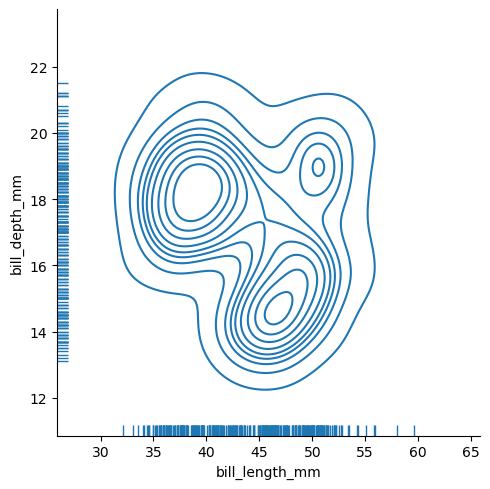

In [7]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

또한 axes-level rugplot() 함수는 어느 종류의 그래프에나 rug를 추가하여 사용할 수 있다. 

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

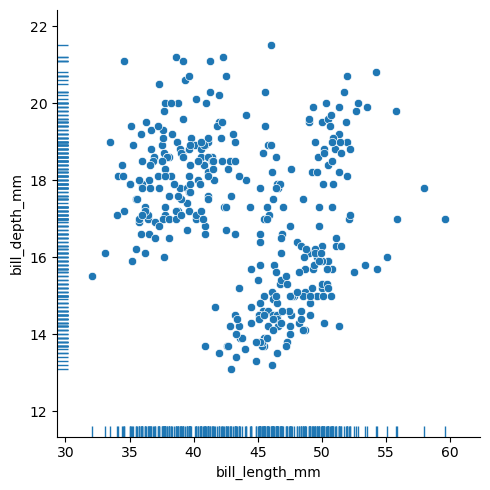

In [8]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

### Plotting many distributions

'pairplot()' 함수는 joint와 marginal 분포의 유사한 조합을 제공한다. 단순한 관계에 집중하기 보다는 'small-multiple' 한 방식의 접근을 통해 단변량 분포를 시각화한다. 이 때, 데이터 셋에 속한 모든 변수끼리의 관계가 포함된다. 

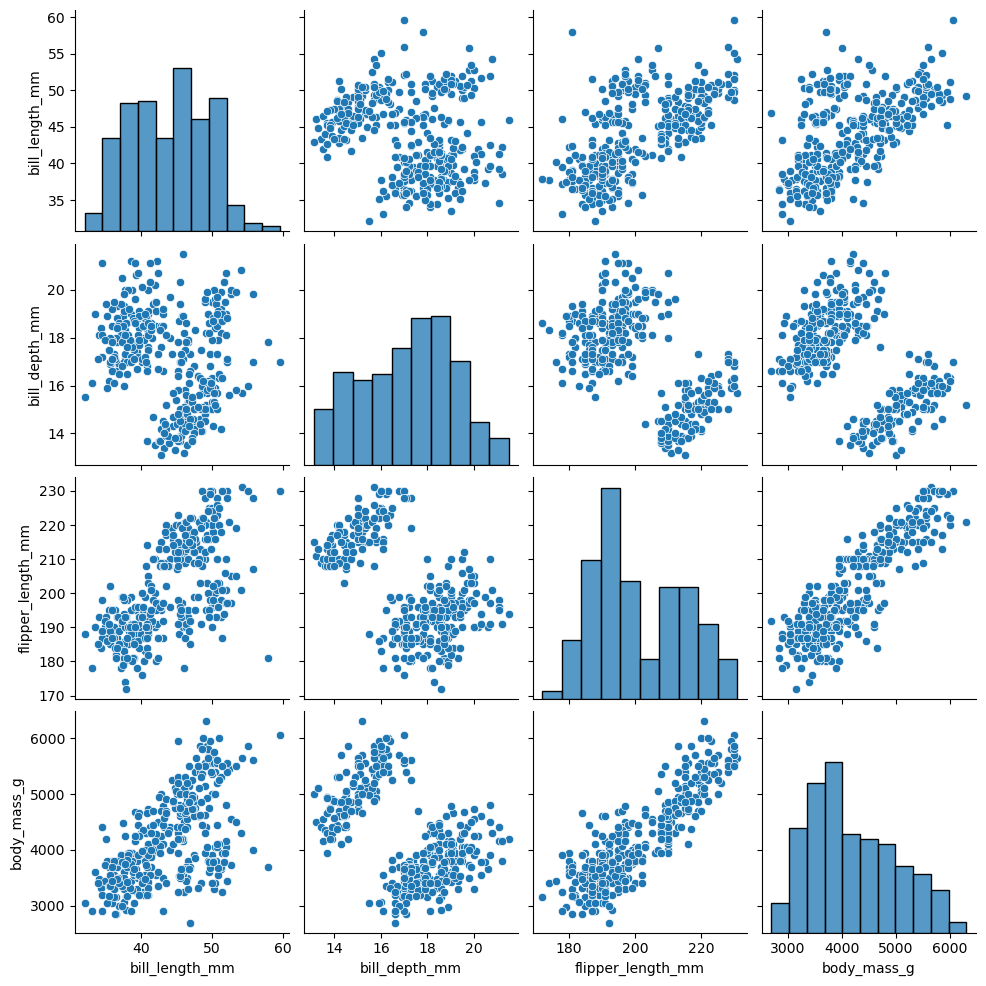

In [9]:
sns.pairplot(penguins)

Jointplot(), JointGrid와 마찬가지로, 기본 PairGrid를 직접 사용하면 몇 번의 타이핑만으로 더 많은 유연성을 얻을 수 있다. 

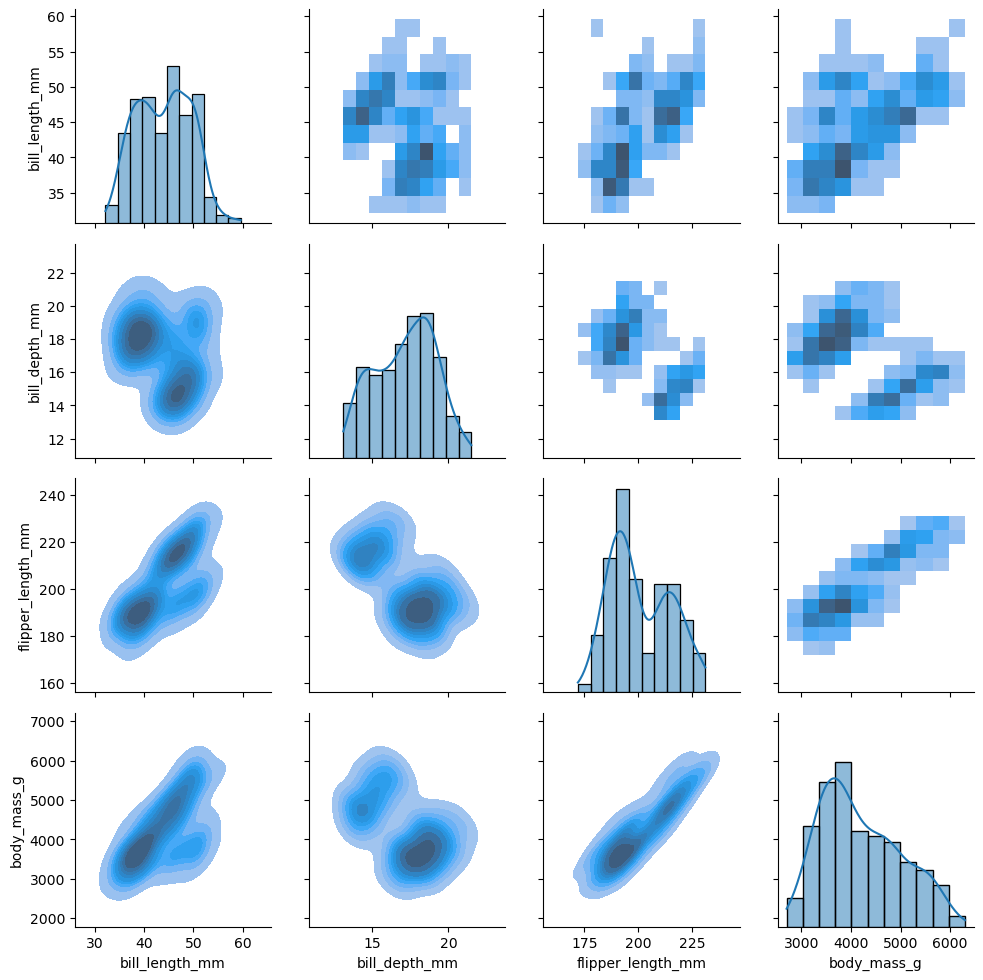

In [10]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)